# Import relevant libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURES_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

# Load the Data

In [3]:
# Features 
X_test = np.loadtxt(TEST_FEATURES_MATRIX, delimiter=' ')

# Targets
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [4]:
prob_token_spam

array([1.12627743e-02, 5.14026302e-03, 6.95207850e-03, ...,
       1.32323602e-04, 5.08936933e-06, 1.52681080e-05])

In [5]:
X_test.shape

(1725, 2500)

In [6]:
prob_all_tokens.shape

(2500,)

# Set the prior

$$P(Spam \,  | \, X) = \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)}$$

However, we are working with small numbers that are very close together, so taking log will spread out our values

$$log(P(Spam \,  | \, X)) = log(P(X \, | \, Spam)) - log(P(X)) + log(P(Spam))$$

In [7]:
# as u can see, the values is prettier and also easier to deal with
np.log(prob_token_spam)

array([ -4.4862523 ,  -5.27065103,  -4.9687146 , ...,  -8.9302601 ,
       -12.18835664, -11.08974435])

In [8]:
# From previous file
PROB_SPAM = 0.3116

In [14]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)
joint_log_spam

array([  18.98531914,    1.05442348,   18.13774297, ..., -403.47200575,
        -40.86955745,  -13.9263681 ])

<p><p>

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham) \, (1-P(Spam))} {P(X)}$$

In [12]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)
joint_log_ham

array([-58.2111645 , -10.27660376, -36.05491112, ...,  74.87607879,
         9.0962366 ,  -4.8597362 ])

<p><p>

# Making Prediction

## Checking for the higher joint probability

$$P(Spam \, | \, X) > P(Ham \, | \, X) $$

**Challenge**: Can you create the vector of predictions, our $\hat y$ ? Remember that spam emails should have the value 1 (true) and non-spam emails should have the value 0 (false). Store your results in a variable called `prediction`.

In [16]:
prediction = joint_log_spam > joint_log_ham
prediction

array([ True,  True,  True, ..., False, False, False])

In [19]:
prediction[-5:]*1

array([0, 0, 0, 0, 0])

In [20]:
# Compare with the real target
y_test[-5:]

array([0., 0., 0., 0., 0.])

# Simplify

$$P(Spam \, | \, X) > P(Ham \, | \, X) $$


$$\frac{P(X \, | \, Spam) \, P(Spam)}{P(X)} > \frac{P(X \, | \, Ham) \, (1-P(Spam))} {P(X)}$$


$$ P(X \, | \, Spam) \, P(Spam) > P(X \, | \, Ham) \, (1-P(Spam))$$

<p></p>

**Note:**
$$P(X \, | \, Spam) \, P(Spam) ≠  \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)}$$

However, the relationship between these two variables is still the same.

And one more reason is that this implementation appears in many professional algorithm

In [21]:
simplified_joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)
simplified_joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)


# Metrics and Evaluation

## Accuracy

In [26]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly: ',correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly: ',numdocs_wrong)


Docs classified correctly:  1675
Docs classified incorrectly:  50


In [27]:
# Accuracy
correct_docs/len(X_test)
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 2.90%
Accuracy of the model is 97.10%


# Visualising the Results

In [39]:
# chart styling info
yaxis_label = 'P (X | Spam)'
xaxis_label = 'P (X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

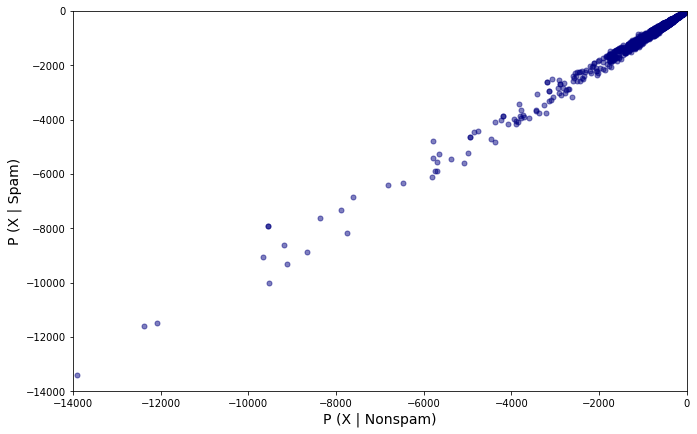

In [38]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(simplified_joint_log_ham, simplified_joint_log_spam, color='navy', alpha=0.5, s=25)
plt.show()

## The Decision Boundary

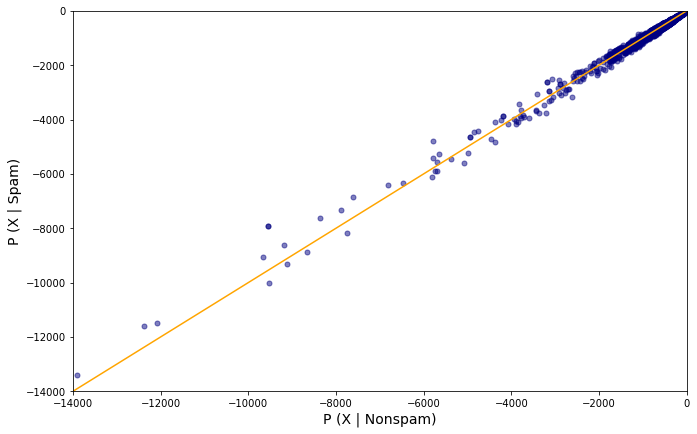

In [40]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(simplified_joint_log_ham, simplified_joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

## More detail charts from the one above

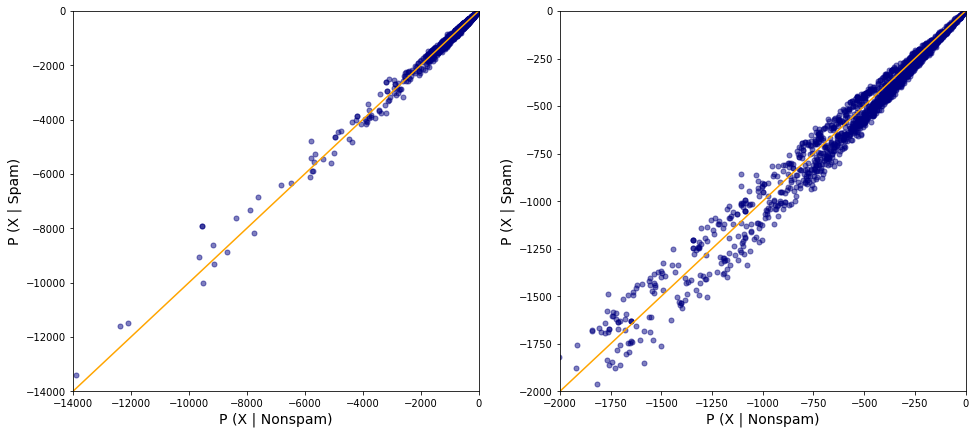

In [44]:
plt.figure(figsize=(16,7))

# Chart Number 1:
plt.subplot(1,2,1)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
## Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])
plt.scatter(simplified_joint_log_ham, simplified_joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')


# Chart Number 2:
plt.subplot(1,2,2)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
## Set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(simplified_joint_log_ham, simplified_joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

****

### Improving our charts by using Seaborn

In [48]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: simplified_joint_log_spam, xaxis_label: simplified_joint_log_ham,
                          labels: y_test})

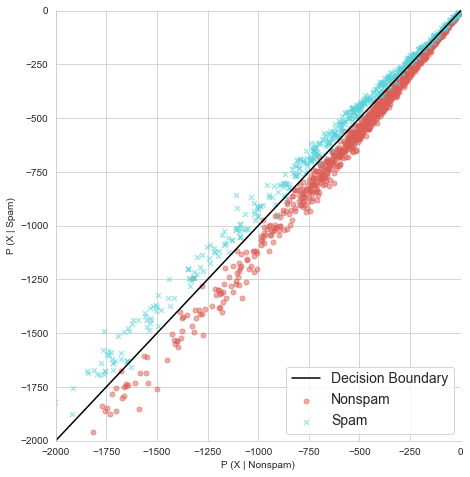

In [56]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls')

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)
